# Data understanding

#### a) Define the question

Building a model to check who was more likely to survive, using available data and calculating the metrics

#### b) Metrics for success

The project will be considered successful if we are able to build a KNN classifier with a high accuracy.

#### c) Understanding the context

The Titanic was a luxury ship, which at its time, was the largest ship afloat, and was the second of three Olympic-class ocean liners operated by the White Star Line. On its maiden voyage on 15th April 1912, it hit an iceberg, leading to the deaths of over 1500 passengers and crew, of the 2240 on board.

It had people from diverse backgrounds on board, from high-ranking officials, wealthy industrialists, dignitaries, celebrities and mostly common folk , who had paid less than USD20 to make the crossing

We have been provided with 2 datasets to build a model prediction from to check the possibility of survival.

#### d) Recording the experimental design 

The following steps will be followed during this exercise:
- Data Understanding
- Data Preparation
- Data Cleaning
- Perform EDA
- Modelling with KNN
- Evaluation
- Challenging the solution

#### e) Data relevance. 

The data collected was saved in  .csv formart. It contains the following columns:
- PassengerID: passenger's unique ID.
- Survived(On train): whether a passenger survived(1) or not(0).
- Pclass: Train class(1st, 2nd or 3rd)
- Name: Passenger's name.
- Sex: Passenger's sex.
- Age: Passenger's age.(It is fractional if less than 1. If the age is estimated, is it in the form of xx.5)
- SibSp: Number of siblings or spouse on board the Titanic. It defines family relations in this way:
  * Sibling = brother, sister, stepbrother, stepsister
  * Spouse = husband, wife (mistresses and fiancés were ignored)
- Parch: Number of parents or children on board the Titanic. It defines family relations in this way:
  * Parent = mother, father
  * Child = daughter, son, stepdaughter, stepson. Some children travelled only with a nanny, therefore parch=0 for them.
- Ticket: Ticket Number.
- Fare: Passenger fare.
- Cabin: Cabin number.
- Embarked: Point of Embarkation(C = Cherbourg, Q = Queenstown or S = Southampton).

# Data preparation

## Importing the libraries. 

In [2]:
# Import all necessary libraries. 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics




## Reading the Data 

In [3]:
# Loading our datsets
train = pd.read_csv('train (5).csv')
test = pd.read_csv('test (1).csv')

In [4]:
# Previewing the first 10 records of train dataframe
#
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
# Previewing the first 10 records of test dataframe
#
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [6]:
# Previewing the last 10 records of train dataframe
#
train.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [7]:
# Previewing the last 10 records of test dataframe
#
test.tail(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
408,1300,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
409,1301,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
410,1302,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
411,1303,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q
412,1304,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [8]:
# Setting Passenger ID as index since it already is our unique identifier
#
train = train.set_index('PassengerId')
test = test.set_index('PassengerId')

#Preview tes dataframe to confirm
#
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Exploring the Data

In [9]:
# Checking the number of rows and columns
#
print(train.shape)
print(test.shape)


(891, 11)
(418, 10)


> Our train dataset has 11 columns and 891 entries, while the test dataset has 10 olumns and 418 rows, tus a total of 1309 entries in both.

In [10]:
# Checking the column datatypes
#
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       33

> All the columns in the dataset seem to have the appropriate datatype. 

# Data Cleaning
We shall tidy our dataset using the data integrity rules: Validity, Accuracy, Completeness, Consistency & Uniformity

In [11]:
# Cheking our column names
#
print(train.columns)
print(test.columns)

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')


> Our column titles have no issues, however for consistency, we will change them to lowercase.

In [12]:
# Changing column titles to lower case
#
train.columns = train.columns.str.lower()
test.columns = test.columns.str.lower()
# Previewing the columns to confirm whether the changes have taken effect
#
print(train.columns)
print(test.columns)

Index(['survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked'],
      dtype='object')
Index(['pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare',
       'cabin', 'embarked'],
      dtype='object')


> Our column titles are now all consistent.

In [13]:
# Checking for the missing values
print(train.isna().sum())
print(test.isna().sum())

survived      0
pclass        0
name          0
sex           0
age         177
sibsp         0
parch         0
ticket        0
fare          0
cabin       687
embarked      2
dtype: int64
pclass        0
name          0
sex           0
age          86
sibsp         0
parch         0
ticket        0
fare          1
cabin       327
embarked      0
dtype: int64


> We have quite some missing data on the age & cabin columns for both datasets. We also have 2 entries on 'embarked' column with nulls. We will drop the 'embarked' nulls, however, we wont be dropping for the other columns since we'd be losing a huge chunk of our data.
>
> We shall create a box plot for age column to check for outliers so as to know the appropriate measure of central tendency to impute.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


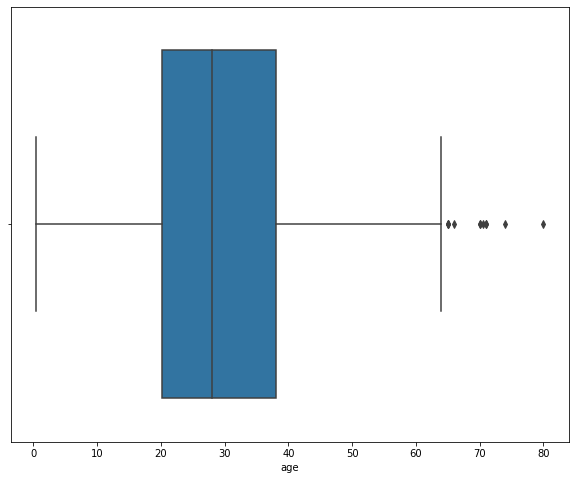

In [14]:
# Box plot for age, train set
#
fig, ax = plt.subplots(figsize = (10,8))
sns.boxplot(train.age)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


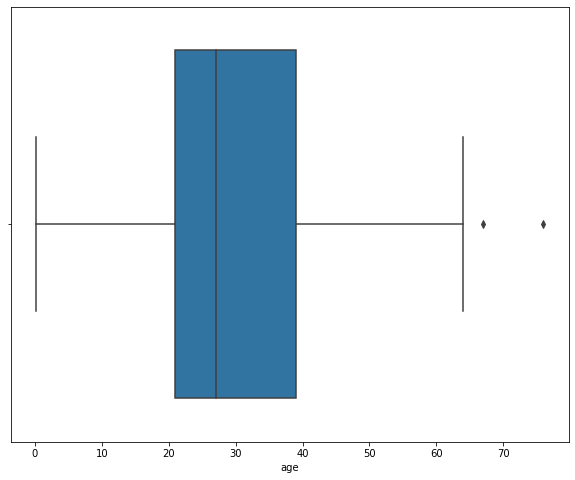

In [15]:
# Box plot for age, test set
#
fig, ax = plt.subplots(figsize = (10,8))
sns.boxplot(test.age)

> Our age columns do not have significant outliers, thus we shall impute with the mean

In [16]:
# Imputing the mean for the age columns
#
train['age'].fillna(train["age"].mean(), inplace=True)
test['age'].fillna(test["age"].mean(), inplace=True)

# Checking for the missing values
#
print(train.isna().sum())
print(test.isna().sum())

survived      0
pclass        0
name          0
sex           0
age           0
sibsp         0
parch         0
ticket        0
fare          0
cabin       687
embarked      2
dtype: int64
pclass        0
name          0
sex           0
age           0
sibsp         0
parch         0
ticket        0
fare          1
cabin       327
embarked      0
dtype: int64


> We'll drop the cabin column since we shall use the pclass to give us information on the passenger's social status, which would determine their cabin location

In [17]:
# Dropping cabin column
#
train.drop(['cabin'],axis = 1)
test.drop(['cabin'],axis = 1)

,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked
PassengerId,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,S
894,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,Q
895,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,S


In [18]:
# Checking for duplicates
#
print(train.duplicated().sum())
print(test.duplicated().sum())

0
0


> No duplicates

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


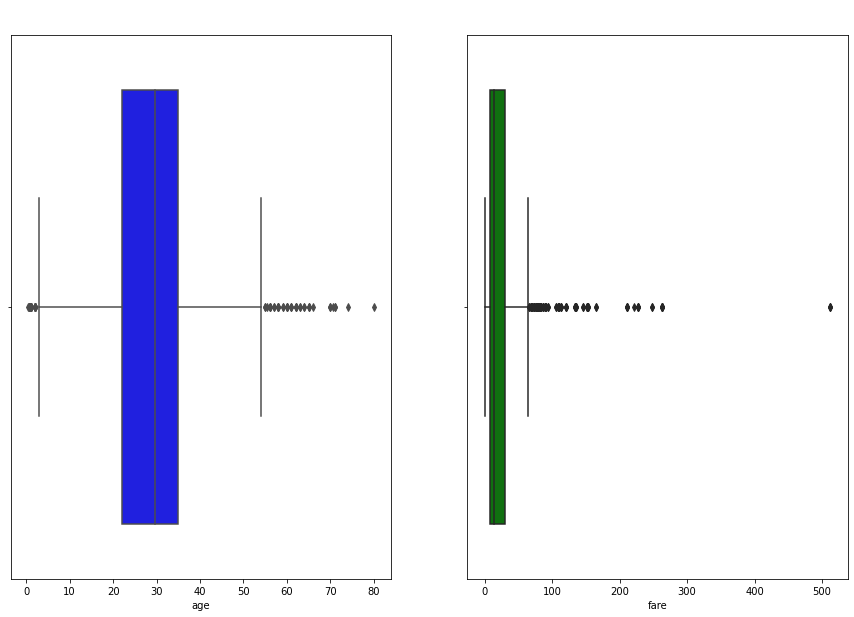

In [19]:
# Checking for outliers, train
#
#Defining the columns to check for outliers.
#
cols = ['age','fare']
#Defining the colors to be used in the boxplots
#
colors = ['blue','green']

#Used a for loop to plot boxplots for each of the selected columns.
#
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,10))
plt.suptitle('Checking for outliers',fontsize=15,y=0.92,color='white')
for ax,data,column,color in zip(axes.flatten(),train,cols,colors):
  sns.boxplot(train[column], ax=ax, color=color)
  ax.set_facecolor('white')


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


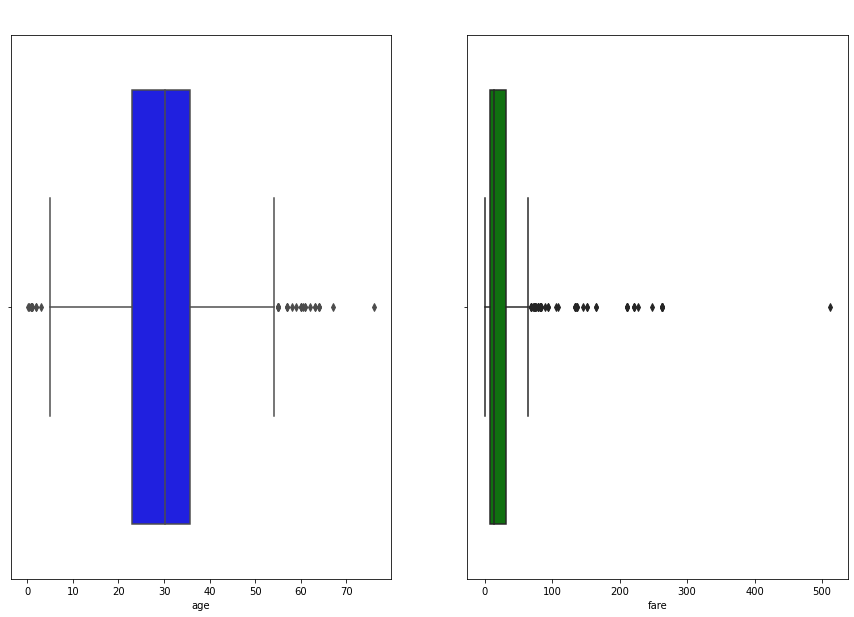

In [20]:
# Checking for outliers, train
#
#Defining the columns to check for outliers.
#
cols = ['age','fare']
#Defining the colors to be used in the boxplots
#
colors = ['blue','green']

#Used a for loop to plot boxplots for each of the selected columns.
#
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,10))
plt.suptitle('Checking for outliers',fontsize=15,y=0.92,color='white')
for ax,data,column,color in zip(axes.flatten(),test,cols,colors):
  sns.boxplot(test[column], ax=ax, color=color)
  ax.set_facecolor('white')


> We won't drop our outliers for now

## Feature Engineering

In [21]:
# We would like to know the family size of our passengers
# We will use the 'sibsp' & 'parch' columns to get the family size. We will also add in '1' to cater for the individual
#
train['family_size'] = train['sibsp'] + train['parch'] + 1
test['family_size'] = test['sibsp'] + test['parch'] + 1

## Univariate 

### Measures of Central Tendency & Dispersion

In [ ]:
# Plotting the univariate summaries and recording our observations
#

def uni_stats(df):
  out_df = pd.DataFrame(columns=['Count', 'Unique', 'Mode', 'Mean', 'Min','25%', 'Median', '75%', 'Max', 'Std_dev', 'Skew', 'Kurt' ])


  for col in df:
    out_df.loc[col] = [df_num[col].count(), df_num[col].nunique(), df_num[col].mode().values[0], df_num[col].mean(), df_num[col].min(), 
                         df_num[col].quantile(0.25), df_num[col].median(), df_num[col].quantile(0.75), df_num[col].max(), df_num[col].std(), df_num[col].skew(), df_num[col].kurt()]
  return out_df

uni_stats(df_num)

,Count,Unique,Mode,Mean,Min,25%,Median,75%,Max,Std_dev,Skew,Kurt
age,3163.0,93.0,51.154214,51.154214,1.0,38.00,51.154214,64.00,98.00,17.881969,-0.175276,-0.625620
tsh,3163.0,239.0,0.000000,5.046782,0.0,0.00,0.400000,1.80,530.00,22.160083,11.041893,178.553139
t3,3163.0,69.0,0.000000,1.513531,0.0,0.50,1.600000,2.20,10.20,1.191836,1.139446,4.457922
tt4,3163.0,269.0,0.000000,100.281031,0.0,76.00,100.000000,124.00,450.00,52.588757,0.693852,3.873765
t4u,3163.0,158.0,0.000000,0.901502,0.0,0.82,0.940000,1.05,2.21,0.341286,-0.914779,2.320298
fti,3163.0,280.0,0.000000,106.386310,0.0,85.00,105.000000,126.00,881.00,65.607474,3.633281,32.531517


> The plot above contains our measures of central tendency and dispersion. 

### Plots

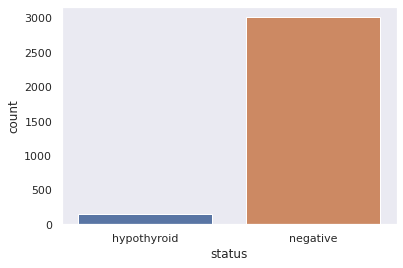

In [ ]:
# Plotting the number of patients with hypothyroidism vis-a-vis those without
sns.set(style= "dark")
ax = sns.countplot(x="status", data=df)

> From our plot, we see that most of the patients tested negative for hypothyroidism

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_

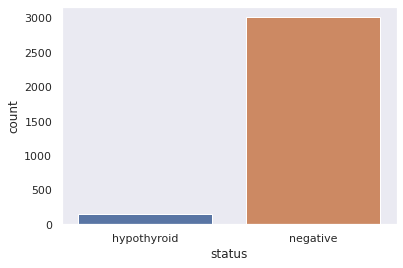

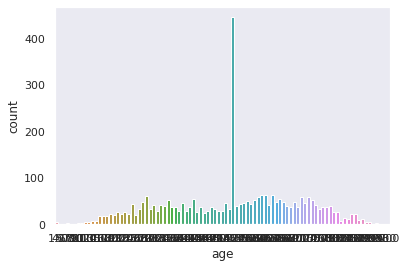

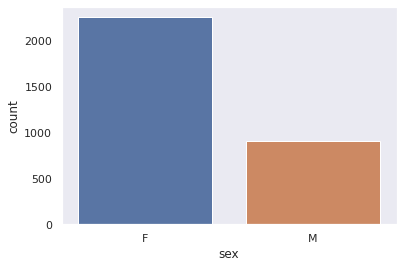

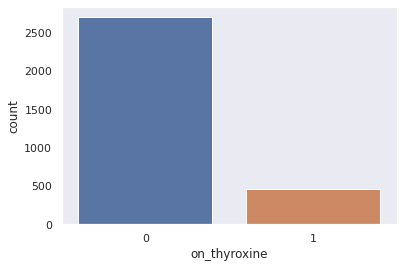

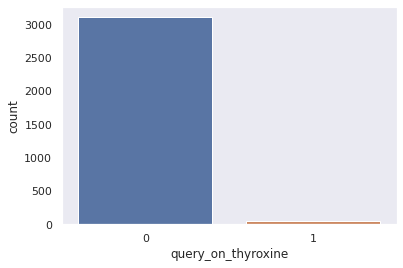

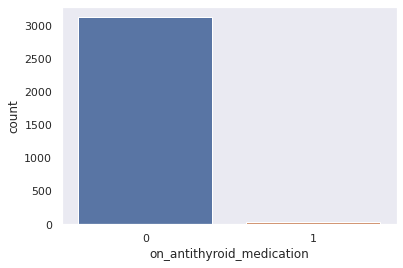

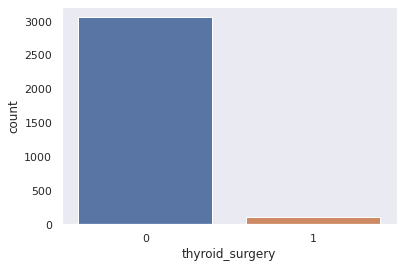

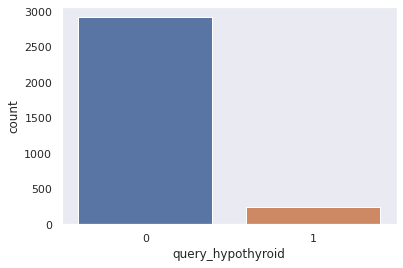

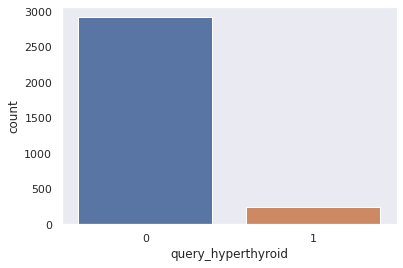

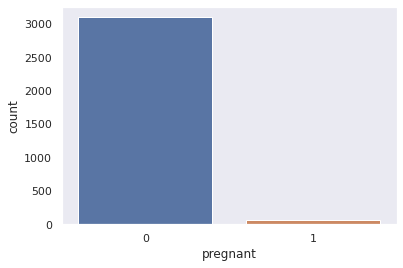

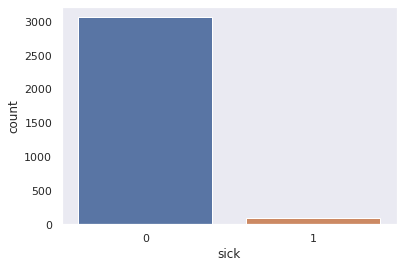

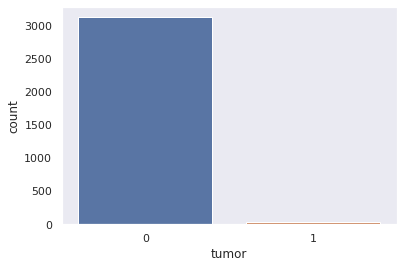

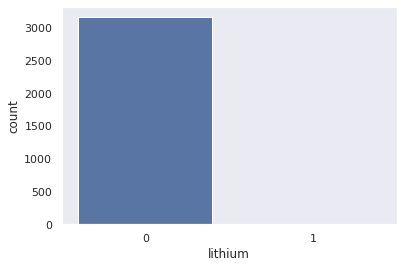

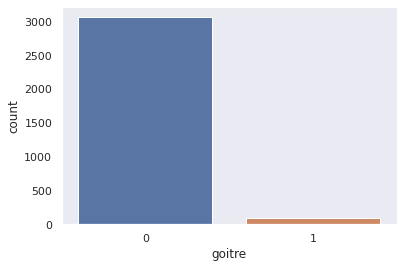

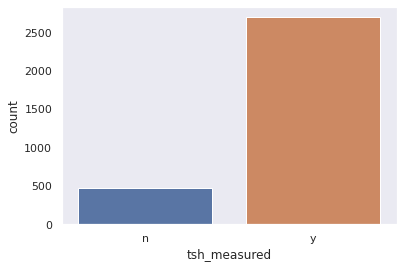

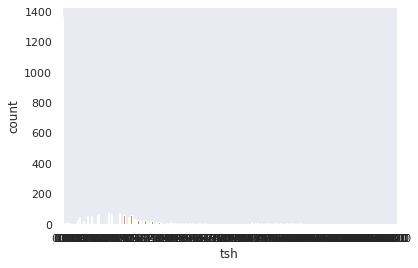

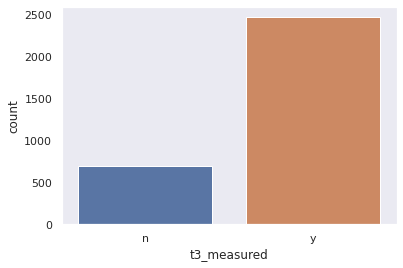

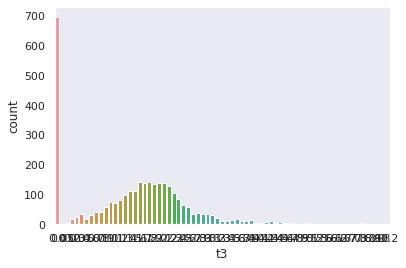

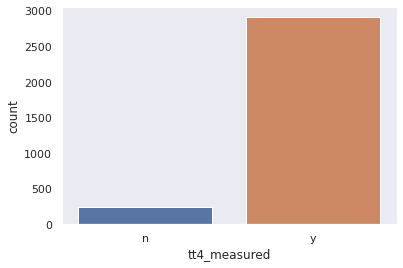

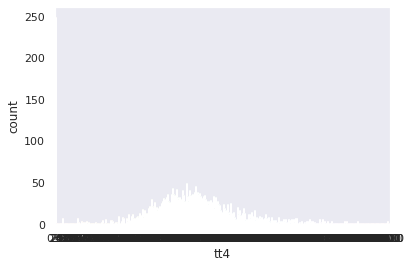

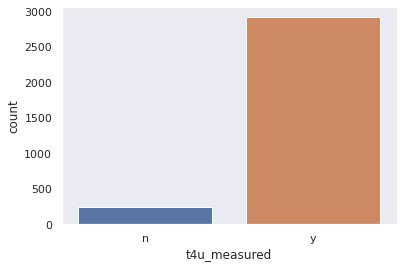

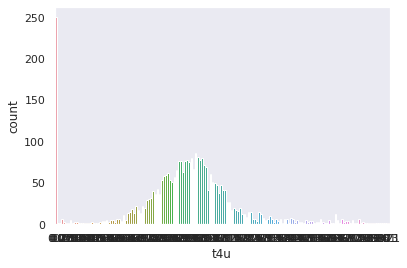

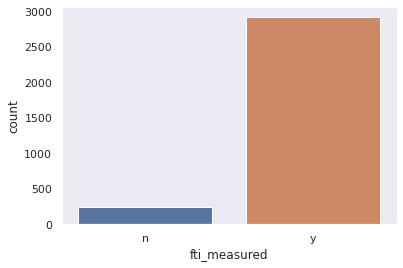

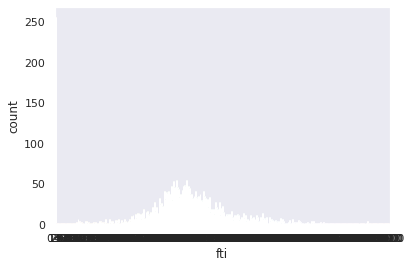

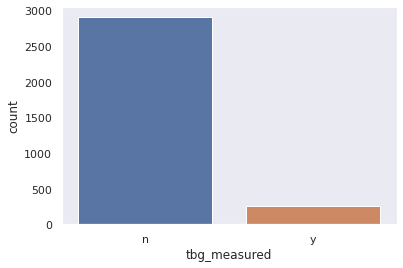

In [ ]:
# Plotting distribution of patients across the different variables
#

for i, col in enumerate(df.columns):
    plt.figure(i)
    sns.countplot(x=col, data=df)



> From our plots above, we can see that most of our patients are negative. A very low portion of our patients suffer from hypothyroidism
>
> From our summary statistics earlier, we had seen that our modal age was 51. From our plot, we can see that that age has more than 5 times as many patients as compared to the other ages.
>
> We can also see that most of our patients were female. Actually, the male patients correspond to less than half of the total female patients. 
> 
> Patients who are currently on thyroxine correspond to less than a quarter of those who aren't.
>
> The values for patients with quesries on thyroxine, hypothyroidism & hyperthyroidoism are significantly low as compared to those without.
>
> Patients who are on anti-thyroid medication, have had thyroid surgery,are pregnant, sick, have a tumor or goitre, are extremely low as compared to those who have none of those conditions.
>
> We shall check on the relationships between our tests and other variables to comment appropriately on them, although we do have plots on their distributions as shown. Most patients were tested f

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warnin

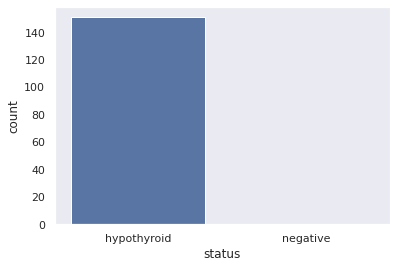

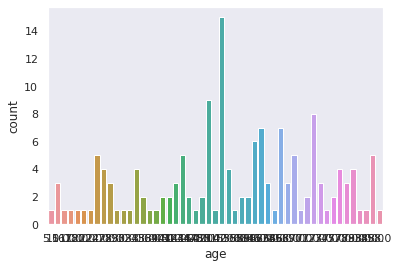

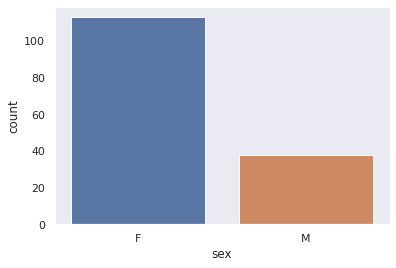

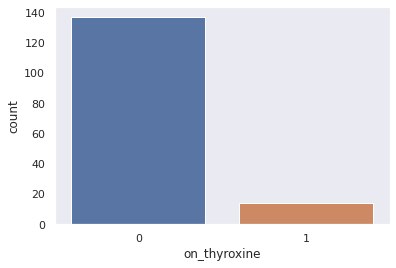

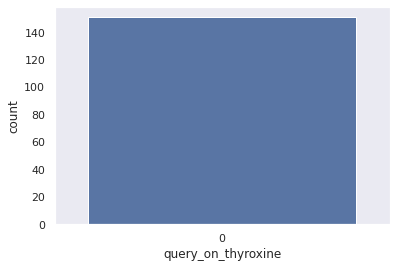

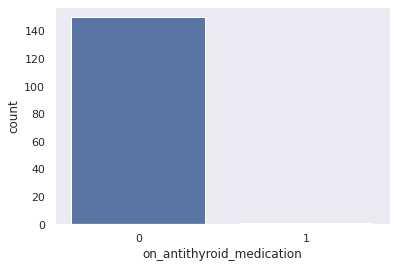

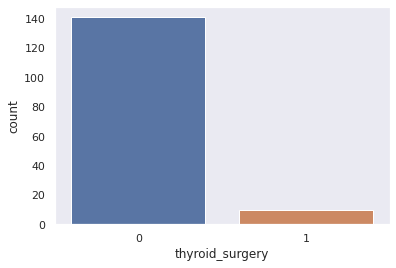

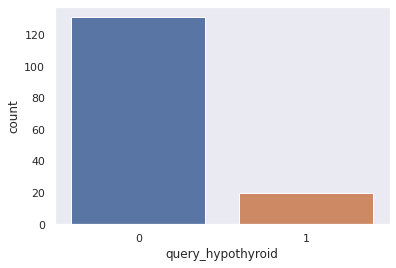

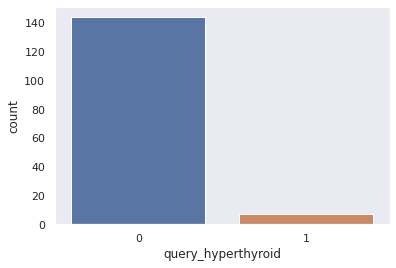

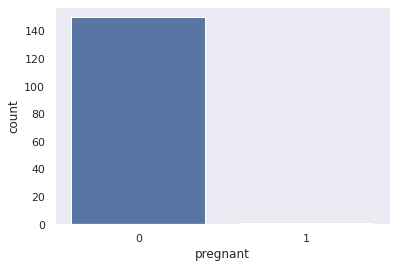

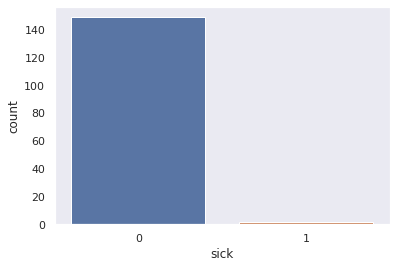

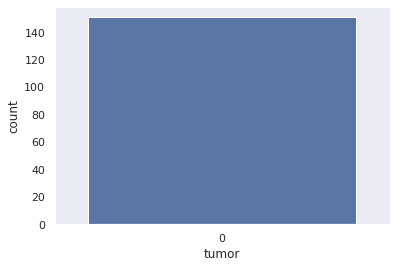

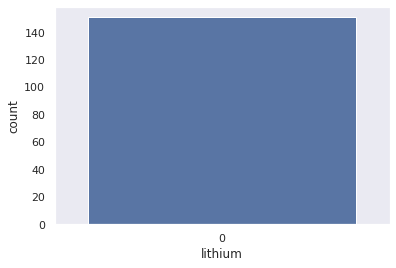

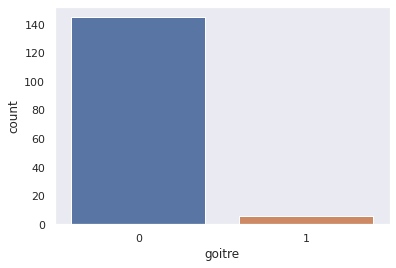

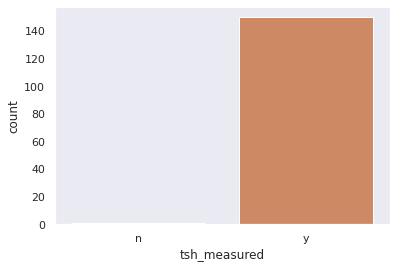

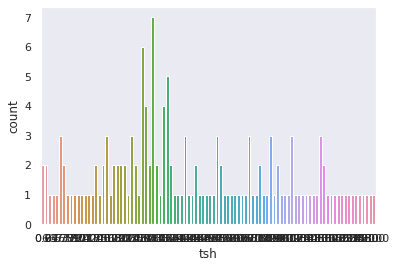

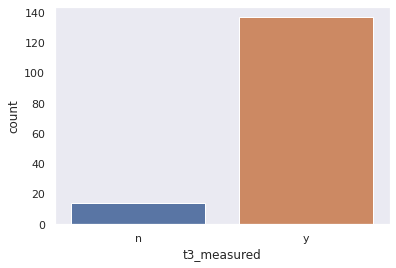

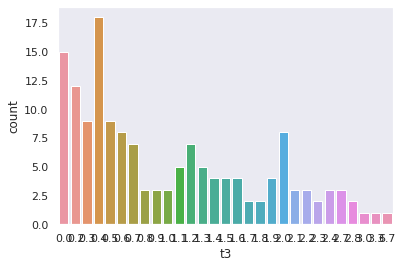

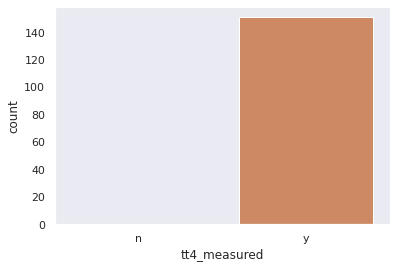

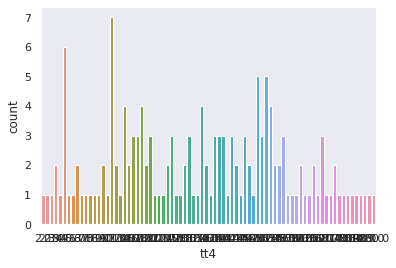

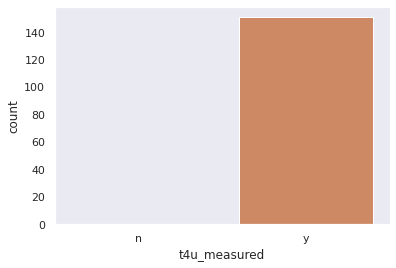

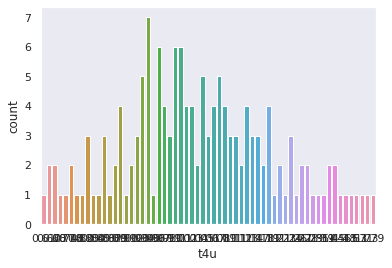

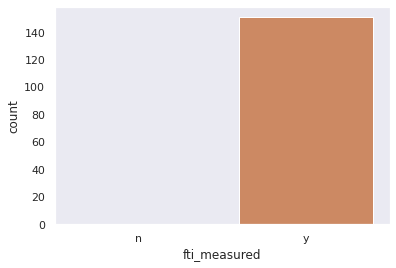

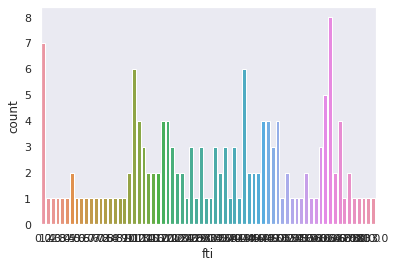

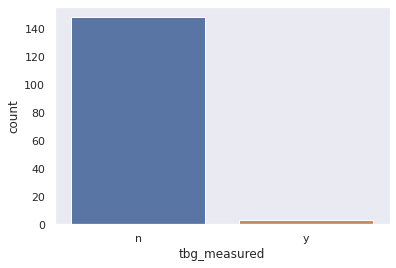

In [ ]:
# Plotting distribution of patients suffering from hypothyroidism across the different variables
#
df1 = df[df['status'] == "hypothyroid"]
# df_1 = df_1.reset_index(inplace=True)

#df1 = df.select_dtypes([np.int, np.float])
for i, col in enumerate(df1.columns):
    plt.figure(i)
    sns.countplot(x=col, data=df1)

> Since we have filtered the dataset to contain patients suffering from hypothyroidism, all of our patients suffer from hypothyroidism
>
> We can still see that our modal age was 51, however the difference isn't as stark when we filter patients with hypothyroidism, as compared to the other ages.
>
> Most of our patients are still female & still correspond to more than twice the male. 
> 
> Patients who are currently on thyroxine are extremely few as compared to those who arent.
>
> The values for patients with quesries on thyroxine, hypothyroidism & hyperthyroidoism are significantly low as compared to those without.
>
> Patients who are on anti-thyroid medication, have had thyroid surgery,are pregnant, sick, have a tumor or goitre, are extremely low as compared to those who have none of those conditions.
>
> Most of the distributions for patients ith hypothyroidism are consistent with the general distributions above.

## Bivariate 

<Figure size 480x320 with 0 Axes>

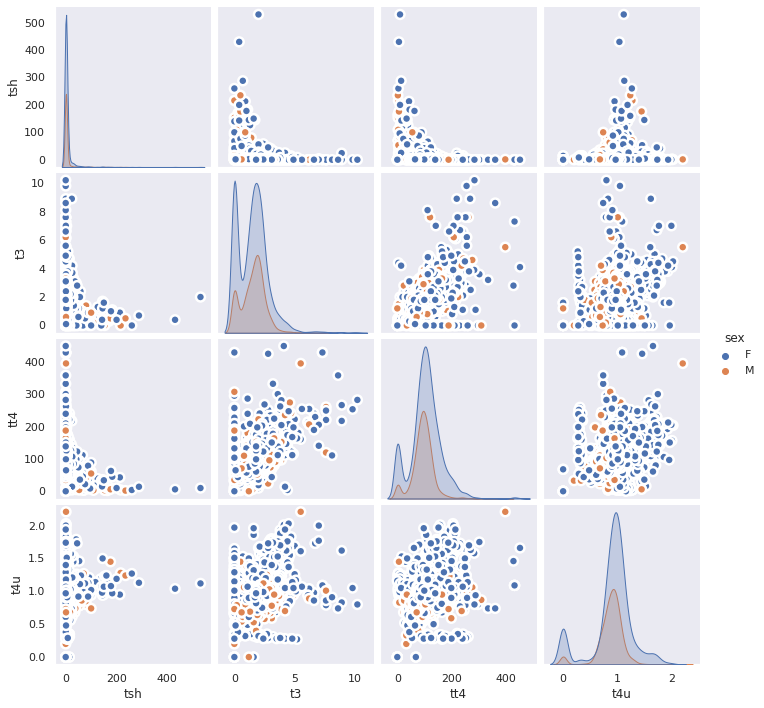

In [ ]:
# Ploting our bivariate summaries and recording our observations
#
plt.figure(dpi= 80)
sns.pairplot(df[['tsh', 't3', 'tt4', 't4u', 'sex']], kind="scatter", hue="sex", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

> We can see that t3 & tt4 and tt4 & t4u pairs have a relationship. Let's check this further with our correlation.

In [ ]:
# Check for correlation
#
correlation = df_num.corr()
correlation

,age,tsh,t3,tt4,t4u,fti
age,1.000000,0.011725,-0.079260,-0.005226,-0.028418,0.072473
tsh,0.011725,1.000000,-0.085072,-0.220293,0.095537,-0.186038
t3,-0.079260,-0.085072,1.000000,0.502813,0.457418,0.336268
tt4,-0.005226,-0.220293,0.502813,1.000000,0.599128,0.763978
t4u,-0.028418,0.095537,0.457418,0.599128,1.000000,0.204452
fti,0.072473,-0.186038,0.336268,0.763978,0.204452,1.000000


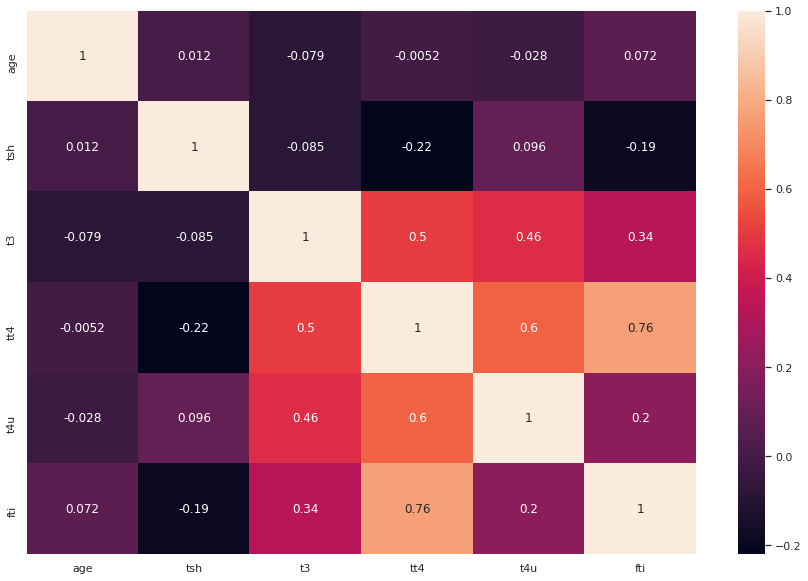

In [ ]:
# Plotting a correlation heatmap
#
plt.figure(figsize = (15,10))
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)

> We can see a high positive correlation between the fti & tt4 tests at 0.76 and tt4 & tu tests at 0.6. There is a low positive correlation between t3 & tt4, fti & t3, fti & t4u, t4u & t3 and tt4 & t3.  
T3 & age and t3 & tsh have low negative correlation.

#### Check for Multicollinearity

## Multivariate Analysis

In [ ]:
# We shall do LDA for our multivariate analysis, seeing as we are doing a supervised learning algorithm.
# We'll first divide our dataset into feature set and corresponding labels
X = df.drop(['status'],1)
y = df['status']

# Splitting the data into train and test sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

# standardizing our data
#
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

lda = LDA(n_components = 1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

# Printing symptoms that indicate whether a patient has hypothyroidism or not, in order of how much weight each of them carries 
#
factors = pd.DataFrame (index = X.columns.values, data = lda.coef_[0].T)
# pd.options.display.float_format = '{:.8f}'.float_format
factors.sort_values(0, ascending = False)

,0
tt4,3.501563
sick,0.198535
sex,0.180261
pregnant,0.170860
tumor,0.166874
t3,0.139745
query_on_thyroxine,0.123924
lithium,0.103668
query_hypothyroid,0.096633
on_thyroxine,0.054393


> From our LDA, we can see that tt4, whether a patient is sick, pregnant or has a tumor, their sex, has queries on hypothyroid & thyroxine or is on antithyroid medication are high at determining whether one has hypothyroidism.
>
> Those that least affect that are whether one has had thyroid surgery, goitre, queies on hyperthyroid, fti, t4u & tsh tests as well as one's age

# Modelling 


#### Checking for Multicollinearity

In [ ]:
# We will use the VIF core to check our multicollinearity
#
pd.DataFrame(np.linalg.inv(correlation.values), index = correlation.index, columns=correlation.columns)


,age,tsh,t3,tt4,t4u,fti
age,1.023120,-0.001172,0.105905,0.162424,-0.071710,-0.219406
tsh,-0.001172,1.172702,0.054313,0.758185,-0.536032,-0.269655
t3,0.105905,0.054313,1.424864,-0.389882,-0.400525,-0.096958
tt4,0.162424,0.758185,-0.389882,5.380662,-2.427449,-3.354024
t4u,-0.071710,-0.536032,-0.400525,-2.427449,2.399671,1.404058
fti,-0.219406,-0.269655,-0.096958,-3.354024,1.404058,3.273676


> All of our columns have no multicollinearity, except for the tt4 test which has 5.38. Since it is close to 5, we shall leave it and do feature importance in our random forest models.

# Evaluation

> From all the models, we have calculated the accuracy score, as well as the RMSE and included the conclusions in each section.
>
> The tuned AdaBoost model had the lowest RMSE score with a high accuracy score, thus is my preferred model. It had  an RMSE of 0.01686 with an accuracy of 98.31%
>
> We also noted that the most important features in the tuned AdaBoost were the FTI levels and TSH levels. 
>
>Thus it is our recommendation that we use the AdaBoost with FTI & TSH as our independent variables to get the most accurate predictions of whether a patient has hypothyroidism.
